Title

# Setup

## Load Libraries

In [12]:
from ucimlrepo import fetch_ucirepo

# General
import pandas as pd
import numpy as np

# Visualizations
from matplotlib import pyplot as plt
import seaborn as sns
#import sweetviz as sv

# Preprocessing
from sklearn.model_selection import train_test_split

# Statistical Tests
from scipy.stats import chi2_contingency



## Load Dataset

In [8]:
# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id = 144)

# Create two seperate pandas dataframe for feature and target variables
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# Combine the features and target together
df = pd.concat([X, y], axis = 1)
df.head(10)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


## Data Dictionary

In [28]:
data_dic = pd.DataFrame(statlog_german_credit_data.variables)


# Seperate Features by type

categorical_features = data_dic[(data_dic["type"] == "Categorical" ) | (data_dic["type"] == "Binary") & (data_dic["role"] == "feature")]["name"].values
print(categorical_features)

numeric_features = data_dic[data_dic["type"] == "Integer"]["name"].values
print(numeric_features)

data_dic

['Attribute1' 'Attribute3' 'Attribute4' 'Attribute6' 'Attribute7'
 'Attribute9' 'Attribute10' 'Attribute12' 'Attribute14' 'Attribute15'
 'Attribute17']
['Attribute2' 'Attribute5' 'Attribute8' 'Attribute11' 'Attribute13'
 'Attribute16' 'Attribute18']


,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


# Feature Engineering / Preprocessing & Cleanup

## Missing Values

In [11]:
# Check for NA's
data_dic

,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


## Check Target Variable for Rare Event

In [10]:
## Check Target Variable for Rare Event
pd.crosstab(index = df['class'], columns = "prop")/pd.crosstab(index = df['class'], columns = "prop").sum()


col_0,prop
class,
1,0.7
2,0.3


## Split Dataset

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'class'], df["class"], test_size = 0.30, random_state = 12345)
print(y_train.head(10))
X_train.head(10)

860    1
202    1
580    2
762    1
390    1
414    2
436    1
100    1
46     1
128    1
Name: class, dtype: int64


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
860,A14,24,A34,A41,5804,A64,A73,4,A93,A101,2,A121,27,A143,A152,2,A173,1,A191,A201
202,A14,27,A33,A49,5117,A61,A74,3,A93,A101,4,A123,26,A143,A152,2,A173,1,A191,A201
580,A12,18,A34,A40,1056,A61,A75,3,A93,A103,3,A121,30,A141,A152,2,A173,1,A191,A201
762,A11,12,A32,A43,2214,A61,A73,4,A93,A101,3,A122,24,A143,A152,1,A172,1,A191,A201
390,A14,18,A32,A40,1820,A61,A73,2,A94,A101,2,A122,30,A143,A152,1,A174,1,A192,A201
414,A11,24,A32,A40,1381,A65,A73,4,A92,A101,2,A122,35,A143,A152,1,A173,1,A191,A201
436,A14,6,A32,A45,660,A63,A74,2,A94,A101,4,A121,23,A143,A151,1,A172,1,A191,A201
100,A14,24,A32,A40,1469,A62,A75,4,A94,A101,4,A121,41,A143,A151,1,A172,1,A191,A201
46,A14,36,A32,A43,2299,A63,A75,4,A93,A101,4,A123,39,A143,A152,1,A173,1,A191,A201
128,A12,12,A34,A41,1860,A61,A71,4,A93,A101,2,A123,34,A143,A152,2,A174,1,A192,A201


## Check for Seperation Issues / Convergence Problems

In [31]:
pd.crosstab(index = y_train, columns = X_train["Attribute1"]).values

array([[ 95, 106,  36, 241],
       [105,  70,  13,  34]])

In [26]:
for i in categorical_features:
  pd.crosstab(index = y_train, columns = X_train[i])




Attribute1,A11,A12,A13,A14
class,,,,
1,95,106,36,241
2,105,70,13,34


# EDA

Split variables between categorical and numeric variables

# Modeling

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


# EDA

In [ ]:
X.head(10)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,4,A122,53,A143,A152,1,A173,1,A191,A201
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,2,A123,35,A143,A151,1,A174,1,A192,A201
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,4,A121,61,A143,A152,1,A172,1,A191,A201
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,2,A123,28,A143,A152,2,A174,1,A191,A201


In [ ]:
y.head(10)

,class
0,1
1,2
2,1
3,1
4,2
5,1
6,1
7,1
8,1
9,2


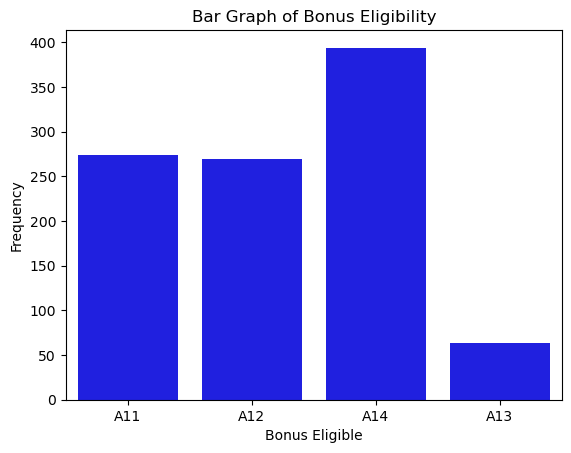

In [ ]:
ax = sns.countplot(x = "Attribute1", data = df, color = "blue")
ax.set(xlabel = 'Bonus Eligible',
       ylabel = 'Frequency',
       title = 'Bar Graph of Bonus Eligibility')
plt.show()

In [ ]:
my_report = sv.analyze(df, target_feat = "class)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Split Data

# Categorical

In [ ]:


chi2_contingency(pd.crosstab(index = X['Attribute1'], columns = y['class']), correction = True)